# Topic modeling with (CorEx)

## Data handling

### Load and clean subtitles text

In [1]:
import glob
import json
import text

files = glob.glob("../data/tratamento-precoce-top-200/subtitles-new/*")

subtitles = []

for f in files[:300]:
    with open(f) as file:
        subtitle = json.loads(file.read())
        subtitles.append(' '.join([str(text.clean(x["text"])) for x in subtitle]))

### Subtitle example

In [2]:
print(subtitles[0])

assunt aqu vou vir assunt porqu audienc gost diss decadenc ness program vai busc temp assunt vir vam la ont ministr saud eduard pajuel mud tom sobr trat precoc contr coronaviru diss mudanc discurs mudanc tom pass inclusiv assum ministeri saud prim orientaca ofic sobr tal trat precoc hav ali uso medic hidroxicloroquin ver mectin enfim agor fal nao verdad nunc fal trat precoc diz sobr atend precoc vam ver senh fal atend precoc nao cit cloroquin govern vai segu nao fal senh nao voc fal nao fal senh vam ver teri nenhum vez nao so nao ouv fal nad diss atend precoc nao ouv fal nenhum remedi nao enta porqu diz to fal nao pergunt senh ministeri to ouv desculp nao produz questa senh fal atend precoc outr cole senh fal cloroquin nao troc maquin govern feder senh senh nunc viu nunc viu receit diz coloc pesso tom remedi nunc nao aceit posica enta palavr padro fic incomod ali pergunt report porqu fal enta sobr atend precoc nao sobr trat pra quest enta senh fal cloroquin outr medic fal nunc fal sobr

## CorEx topic modeling

In [3]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
vectorizer = CountVectorizer(binary=True)
wordCount = vectorizer.fit_transform(subtitles)

In [5]:
# Get words that label the columns (needed to extract readable topics and make anchoring easier)
words = list(np.asarray(vectorizer.get_feature_names()))

wordCount.shape # n_docs x m_words

(300, 12592)

### Train the CorEx topic

In [6]:
from corextopic import corextopic as ct
NUM_TOPICS = 9

topic_model = ct.Corex(n_hidden=NUM_TOPICS, words=words, max_iter=200, docs= files, verbose=False, seed=1)
topic_model.fit(wordCount, words=words);

### Print all topics from the CorEx topic model

In [7]:
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ', '.join(topic_words))

0: lad, ir, naquel, fez, fac, car, gost, mand, parec, rest
1: interess, and, atr, tao, talv, ali, tant, celul, possi, mim
2: cri, serv, base, pront, vem, clin, experienc, pesquis, escolh, bast
3: conhec, mecan, encontr, amig, med, situaca, intens, sup, dra, sab
4: verdad, ha, part, inclusiv, convid, cienc, ont, prevenca, aca, us
5: associ, apresent, signif, superi, laboratori, demonstr, cobr, benefici, compar, reconhec
6: pur, sinc, vaz, setembr, indi, invert, avaliaco, comparaca, dezoit, fabr
7: helsinqu, paraib, ja, ama, batalh, precoc, dezenov, caco, turqu, cord
8: disfunca, recorr, sex, acentu, ejaculaca, relaco, peix, simulaca, solidariedad, orgasm


### Print top 10 documents for each topic

In [8]:
for n,topic in enumerate(topics):
    topic_documents = []
    for docId, document in enumerate(topic_model.labels):
        if document[n]:
            videoId = files[docId].split("/")[-1]
            topic_documents.append(videoId)
    print('{}: '.format(n) + ', '.join(topic_documents))

0: YsK2bT68aMs, vK8p7O_JHJI, Rh2MfjOXJJo, os7rasQFdlk, i0zX9o9enD0, 6ipMT1gaj5A, 3Rso-Vxrc0Y, -ekSeKLRpiM, l2uaJJVJOvk, Mwc3_xam1_s, gtOcEDGYAkQ, dNwP6McSxYU, aWX-HFqjxWQ, MUVkYT3psz0, HtA93BZBXAs, 50ZJXm_xRMg, 7OxXv-OSneM, L2fqpq-1eTQ, MrBq5vcsfMg, re_5e4bnVw4, Ut8dfo8iYM4, eAqvjqwQj5k, vR7wJYnk2r4, ZrLk9-CoS28, BHKy1HuZmNc, yehHFVLxEbg, -OwXZGH0W6A, p-amZCOXKgo, 2O246aKnGFY, e1Z9Qx9XqBo, Qf2Ri9YuRg4, 04_wDUkIE0k, qYRfLA6gnVo, ZnEpyvswaEA, mygyAhJjhws, ZxH2GOuConU, RMEzSNi8Zeo, iNJ1F9Iq9To, RBoIY5zjmVM, nKoxeTlJtWg, rV-G3yVNXVQ, M6TPxevpY5I, tDycaPTUGR0, hjTzs4HT5b8, 277cgQD1Q1Q, GRcka5x_0hE, jexdogpfCB0, lbAgqXiXMSc, g4rAXK7Zeow, G7vpEbDSRz8, xRjIktVTBlg, zMnwnB8-ajg, 3W9xsg8TaZw, ZzpuJmyrs4c, hdlYkORhNtY, ODJ5v-bnFVE, umLkrQRn988, s8chHSwf9Lo, 8WTAXcI0K1M, 4r-bgRRbfrs, bqoMDrk6m1c, hVBS2Mx_oag, zRdQsIGyCcg, sHXVxIjQC1U, fS-qB74rwOs, HgVNnxl56w8, OfMD2NubGT0
1: vK8p7O_JHJI, Rh2MfjOXJJo, os7rasQFdlk, i0zX9o9enD0, udwq1w1iJ_8, 6ipMT1gaj5A, 3Rso-Vxrc0Y, -ekSeKLRpiM, l2uaJJVJOvk, Mwc3_xa

In [9]:
# If we need to directly access the topic assignments for each word, they can be accessed through cluster.
print(topic_model.clusters)
print(topic_model.clusters.shape) # m_words

[0 0 0 ... 0 0 6]
(12592,)


In [10]:
print(topic_model.p_y_given_x.shape) # n_docs x k_topics

(300, 9)


In [11]:
print(topic_model.labels.shape) # n_docs x k_topics

(300, 9)


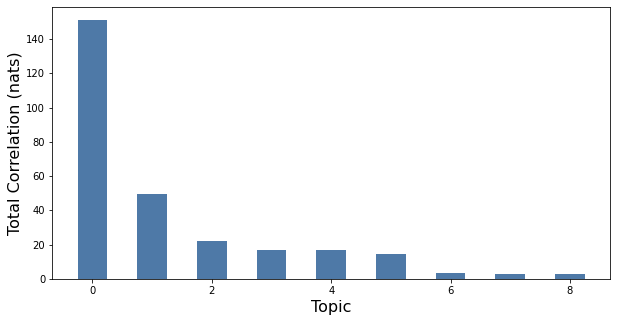

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(range(topic_model.tcs.shape[0]), topic_model.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation (nats)', fontsize=16);

In [13]:
topic_model.tc

279.3445321049061